# Inicio del procesado de datos por parte del equipo dinamita >:D

In [107]:
# from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns


In [108]:

# commands to install packages
# !pip install pandas
# !pip install numpy
# !pip install matplotlib

# !pip install seaborn


In [109]:

# !pip install -U seaborn


In [110]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
apartments = pd.read_csv('apartments.csv')
apartments.head()

,codigo,tipo_propiedad,tipo_operacion,precio_venta,precio_arriendo,area,habitaciones,banos,administracion,parqueaderos,...,permite_mascotas,gimnasio,ascensor,conjunto_cerrado,coords_modified,localidad,barrio,estacion_tm_cercana,distancia_estacion_tm_m,is_cerca_estacion_tm
0,374-M2718950,APARTAMENTO,VENTA Y ARRIENDO,2.500000e+09,13500000.0,320.0,4.0,5.0,2500000.0,3.0,...,1,1,1,1,False,USAQUEN,CIUDADELA REAL,Alcalá,2798.74,0
1,2510-M4156145,APARTAMENTO,VENTA,4.850000e+08,NaN,84.0,3.0,3.0,680000.0,1.0,...,0,0,1,1,False,USAQUEN,SAN PATRICIO,Pepe Sierra,1135.12,0
2,10312-M2873283,APARTAMENTO,VENTA Y ARRIENDO,1.980000e+09,9000000.0,248.0,3.0,3.0,2200000.0,3.0,...,1,0,1,1,False,USAQUEN,CERROS DE SANTA BARBARA,Calle 106,3138.91,0
3,10139-M4343016,APARTAMENTO,VENTA,4.950000e+08,NaN,77.2,3.0,2.0,367000.0,1.0,...,1,1,1,1,False,SUBA,CAMPOS DE SILENCIO,Cardio Infantil,936.00,0
4,10139-M3692828,APARTAMENTO,VENTA,1.570000e+09,NaN,213.0,3.0,4.0,994000.0,3.0,...,0,1,1,1,False,USAQUEN,GINEBRA,Prado Veraniego,2766.29,0


In [112]:
apartments_descriptions = apartments['descripcion']
apartments_descriptions.head()

0    vendo o arriendo ph duplex montearroyo, 320 mt...
1    oportunidad, bonito apartamento, recien refacc...
2    presentamos espectacular apartamento en uno de...
3    lindo apartamento, con 3 habitaciones 2 banos,...
4    vendo o arriendo iraka t 4 apto 201  213m mas ...
Name: descripcion, dtype: object

In [113]:
#  print all columns for apartments
columns = apartments.columns
print(columns)

Index(['codigo', 'tipo_propiedad', 'tipo_operacion', 'precio_venta',
       'precio_arriendo', 'area', 'habitaciones', 'banos', 'administracion',
       'parqueaderos', 'sector', 'estrato', 'antiguedad', 'estado', 'longitud',
       'latitud', 'descripcion', 'datetime', 'website', 'compañia',
       'fecha_actualizacion_precio_venta', 'precio_venta_anterior',
       'fecha_actualizacion_precio_arriendo', 'precio_arriendo_anterior',
       'jacuzzi', 'piso', 'closets', 'chimenea', 'permite_mascotas',
       'gimnasio', 'ascensor', 'conjunto_cerrado', 'coords_modified',
       'localidad', 'barrio', 'estacion_tm_cercana', 'distancia_estacion_tm_m',
       'is_cerca_estacion_tm'],
      dtype='object')


In [114]:
# dimensions
print(apartments.shape)

(63245, 38)


In [115]:
# Remove appartments with price = 0 or null, nan
apartments = apartments[apartments['precio_venta'] > 0]
apartments = apartments[apartments['precio_venta'].notnull()]
apartments = apartments[apartments['precio_venta'].notna()]

In [116]:
# Extract X and Y to predict price
# Columns
# Index(['codigo', 'tipo_propiedad', 'tipo_operacion', 'precio_venta',
#        'precio_arriendo', 'area', 'habitaciones', 'banos', 'administracion',
#        'parqueaderos', 'sector', 'estrato', 'antiguedad', 'estado', 'longitud',
#        'latitud', 'descripcion', 'datetime', 'website', 'compañia',
#        'fecha_actualizacion_precio_venta', 'precio_venta_anterior',
#        'fecha_actualizacion_precio_arriendo', 'precio_arriendo_anterior',
#        'jacuzzi', 'piso', 'closets', 'chimenea', 'permite_mascotas',
#        'gimnasio', 'ascensor', 'conjunto_cerrado', 'coords_modified',
#        'localidad', 'barrio', 'estacion_tm_cercana', 'distancia_estacion_tm_m',
#        'is_cerca_estacion_tm'],
#       dtype='object')

# Removed antiguedad, 'jacuzzi', 'chimenea', 'permite_mascotas', 'gimnasio', 'ascensor', 'conjunto_cerrado', 'is_cerca_estacion_tm'
X = apartments[['area', 'habitaciones', 'banos', 'parqueaderos', 'estrato', ]]
Y = apartments['precio_venta']
# Fill NaN with 0
X = X.fillna(0)



In [117]:
X.head()

,area,habitaciones,banos,parqueaderos,estrato
0,320.0,4.0,5.0,3.0,6.0
1,84.0,3.0,3.0,1.0,6.0
2,248.0,3.0,3.0,3.0,6.0
3,77.2,3.0,2.0,1.0,4.0
4,213.0,3.0,4.0,3.0,3.0


In [118]:

# Print nan values
print(Y.isnull().sum())


0


In [119]:
X.head()

,area,habitaciones,banos,parqueaderos,estrato
0,320.0,4.0,5.0,3.0,6.0
1,84.0,3.0,3.0,1.0,6.0
2,248.0,3.0,3.0,3.0,6.0
3,77.2,3.0,2.0,1.0,4.0
4,213.0,3.0,4.0,3.0,3.0


In [120]:
#  average Y
print(Y.mean())

1510209058.8843825


In [121]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [122]:
# remove X headers

In [123]:

n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
# Always scale the input. The most convenient way is to use a pipeline.
reg = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X, Y)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [125]:

# Print without scientific notation
np.set_printoptions(suppress=True)
print(int(reg.predict([[300, 2, 1, 1, 3]])))

158291724


c:\Users\Sergio99778\Documents\bedu\.venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Sergio99778\AppData\Local\Temp\ipykernel_5944\2180201706.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(int(reg.predict([[300, 2, 1, 1, 3]])))


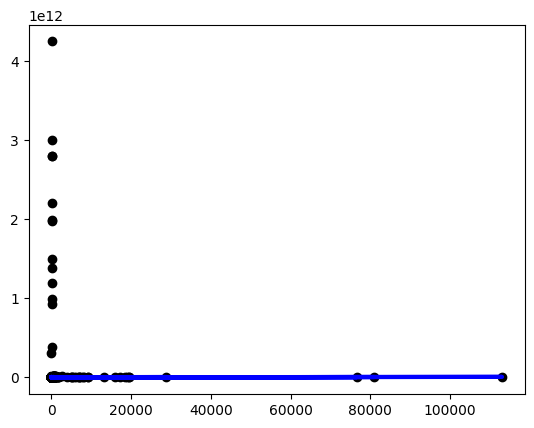

In [127]:
# X['area] values with matplotlib
plt.scatter(X['area'], Y,  color='black')
plt.plot(X['area'], reg.predict(X), color='blue', linewidth=3)


